**Regression**

**Lorenz Dataset**

In [563]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNTU/HW3/regression/Lorenz Dataset.xlsx")
data_L = df.to_numpy()

**Preparing Dataset**

In [566]:
data = data_L
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)
# normalize the input features
def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii]))/(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_5956\3944888030.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_5956\3944888030.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**Define Function**

In [569]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Function to calculate the Gaussian RBF kernel
def rbf_kernel(x, center, sigma):
    net = np.linalg.norm(x - center)
    return np.exp(-net**2 / (2 * sigma**2))

# Function to initialize RBF neuron centers and sigmas
def initialize_parameters(X,num_neurons, number_feature):
    centers = np.zeros((num_neurons, number_feature))
    for i in range(number_feature):
        selected_indices = np.random.choice(X.shape[0], num_neurons, replace=False)
        centers[:, i] = X[selected_indices, i]
    sigma = (X.max() - X.min()) / math.sqrt(2 * num_neurons)
    sigmas = np.ones(num_neurons) * sigma  # Initialize sigmas for each neuron
    return centers, sigmas
def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

**Initialize Rogh RBF**

In [572]:

np.random.seed(42)
num_data = data.shape[0]
percent_train = 0.70
percent_test = 0.15
percent_validation = 0.15

num_train = round(num_data * percent_train)
num_validation = round(num_data * percent_validation)
num_test = num_data - (num_train + num_validation)

n0 = data.shape[1]-1
n1 = 5
n2 = 1
eta_rbf_CS = 0.007
eta_rbf_weights = 0.007

epoch = 200

a, b = -1, 1
alpha = 0.4
beta = 0.6

X_test , Y_test = data[num_train:,:n0],data[num_train:,n0]
X_train, Y_train = data[:num_train,:n0],data[:num_train,n0]



output_data_train = np.zeros(num_train)
output_data_test = np.zeros(num_test)
mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)
mse_error_train = np.zeros((num_train,n2))
mse_error_test = np.zeros((num_test,n2))


**Define Layer**

In [575]:
np.random.seed(42)
name = ["relu","tanh","sigmoid","leaky_relu","pureline"]
#layer 1 information

#layer 2 information
centersl, sigmas = initialize_parameters(X_train,n1, n0)
centersu = centersl
o_rbfu = np.zeros(n1)
o_rbfl = np.zeros(n1)
o_rbf = np.zeros(n1)
w1u = np.random.uniform(-1, 0, (n2, n1))
w1l = np.random.uniform(0, 1, (n2, n1))
net1u = np.zeros(n2)
net1l = np.zeros(n2)
o1u = np.zeros(n2)
o1l = np.zeros(n2)
o1 = np.zeros(n2)
actlayer1 = "pureline"

**Initialize Rough RBF**

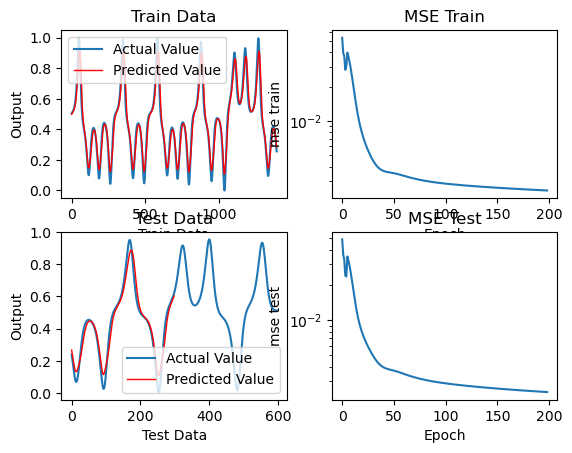

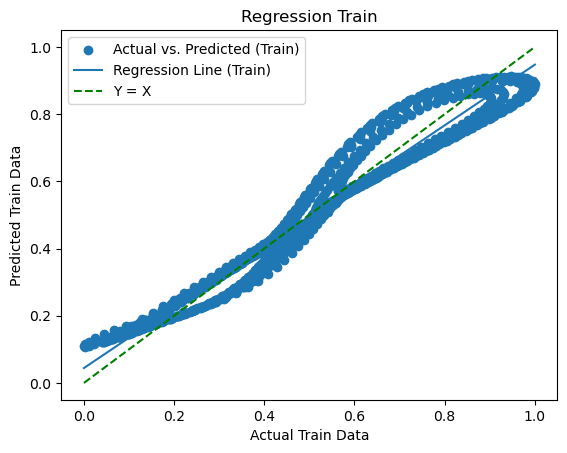

ValueError: x and y must be the same size

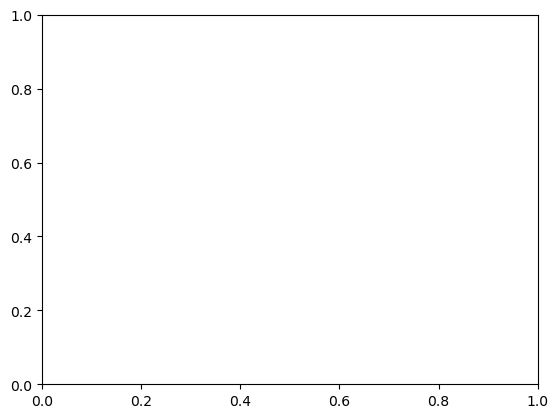

In [578]:
for t in range(epoch):
    error = np.zeros(n2)
    for i in range(num_train):
        X = X_train[i] # n0
        o_rbff = np.array([rbf_kernel(X_train[i], c, sigma) for c, sigma in zip(centersu, sigmas)])
        o_rbfff = np.array([rbf_kernel(X_train[i], c, sigma) for c, sigma in zip(centersl, sigmas)])
        o_rbfu = np.maximum(o_rbff, o_rbfff)
        o_rbfl = np.minimum(o_rbff, o_rbfff)
        o_rbf = 0.5*o_rbfl + 0.5*o_rbfu
        net1u = np.dot(w1u, o_rbf)
        net1l = np.dot(w1l, o_rbf)
        o1u = net1u
        o1l = net1l
        o1 = alpha*o1u + beta*o1l
        target = np.full(n2, Y_train[i])
        error = target - o1
        
        if net1u > net1l:
            for j in range(n1):
                centersu[j] += eta_rbf_CS *alpha* error.reshape(-1,1).T.dot(w1u).dot(o_rbfu)[0] * (X-centersu[j]) * (1/(sigmas[j]**2)) + eta_rbf_CS * beta*error.reshape(-1,1).T.dot(w1l).dot(o_rbfu)[0] * (X-centersu[j]) * (1/(sigmas[j]**2))
                centersl[j] += eta_rbf_CS *alpha* error.reshape(-1,1).T.dot(w1u).dot(o_rbfl)[0] * (X-centersl[j]) * (1/(sigmas[j]**2)) + eta_rbf_CS * beta*error.reshape(-1,1).T.dot(w1l).dot(o_rbfl)[0] * (X-centersl[j]) * (1/(sigmas[j]**2))
                sigmas[j] += eta_rbf_CS *alpha*error.reshape(-1,1).T.dot(w1u).dot(o_rbfl)[0]*(np.linalg.norm(X-centersl[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *alpha*error.reshape(-1,1).T.dot(w1u).dot(o_rbfu)[0]*(np.linalg.norm(X-centersu[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *beta*error.reshape(-1,1).T.dot(w1l).dot(o_rbfl)[0]*(np.linalg.norm(X-centersl[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *beta*error.reshape(-1,1).T.dot(w1l).dot(o_rbfu)[0]*(np.linalg.norm(X-centersu[j])**2)*(1/(sigmas[j]**3))
           
            w1u += eta_rbf_weights * alpha*error.reshape(-1,1).dot(o_rbf.reshape(-1,1).T)
            w1l += eta_rbf_weights * beta*error.reshape(-1,1).dot(o_rbf.reshape(-1,1).T)
            
        if net1u<net1l:
            for j in range(n1):
                centersu[j] += eta_rbf_CS *alpha* error.reshape(-1,1).T.dot(w1l).dot(o_rbfu)[0] * (X-centersu[j]) * (1/(sigmas[j]**2)) + eta_rbf_CS * beta*error.reshape(-1,1).T.dot(w1u).dot(o_rbfu)[0] * (X-centersu[j]) * (1/(sigmas[j]**2))
                centersl[j] += eta_rbf_CS *alpha* error.reshape(-1,1).T.dot(w1l).dot(o_rbfl)[0] * (X-centersl[j]) * (1/(sigmas[j]**2)) + eta_rbf_CS * beta*error.reshape(-1,1).T.dot(w1u).dot(o_rbfl)[0] * (X-centersl[j]) * (1/(sigmas[j]**2))
                sigmas[j] += eta_rbf_CS *alpha*error.reshape(-1,1).T.dot(w1l).dot(o_rbfl)[0]*(np.linalg.norm(X-centersl[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *alpha*error.reshape(-1,1).T.dot(w1l).dot(o_rbfu)[0]*(np.linalg.norm(X-centersu[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *beta*error.reshape(-1,1).T.dot(w1u).dot(o_rbfl)[0]*(np.linalg.norm(X-centersl[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *beta*error.reshape(-1,1).T.dot(w1u).dot(o_rbfu)[0]*(np.linalg.norm(X-centersu[j])**2)*(1/(sigmas[j]**3))
              
            w1u += eta_rbf_weights * alpha*error.reshape(-1,1).dot(o_rbf.reshape(-1,1).T)
            w1l += eta_rbf_weights * beta*error.reshape(-1,1).dot(o_rbf.reshape(-1,1).T)
            
    E_train = np.zeros(num_train)
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        X = X_train[i] # n0
        o_rbff = np.array([rbf_kernel(X_train[i], c, sigma) for c, sigma in zip(centersu, sigmas)])
        o_rbfff = np.array([rbf_kernel(X_train[i], c, sigma) for c, sigma in zip(centersl, sigmas)])
        o_rbfu = np.maximum(o_rbff, o_rbfff)
        o_rbfl = np.minimum(o_rbff, o_rbfff)
        o_rbf = 0.5*o_rbfl + 0.5*o_rbfu
        net1u = np.dot(w1u, o_rbf)
        net1l = np.dot(w1l, o_rbf)
        o1u = net1u
        o1l = net1l
        o1 = alpha*o1u + beta*o1l
        output_data_train[i] = o1
        target = Y_train[i]
        E_train[i] = target - o1
        error_square_train[i] = (E_train[i]) ** 2
    mse_train[t] = np.mean(error_square_train)

    E_test = np.zeros(num_test)
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        X = X_test[i] # n0
        o_rbff = np.array([rbf_kernel(X_test[i], c, sigma) for c, sigma in zip(centersu, sigmas)])
        o_rbfff = np.array([rbf_kernel(X_test[i], c, sigma) for c, sigma in zip(centersl, sigmas)])
        o_rbfu = np.maximum(o_rbff, o_rbfff)
        o_rbfl = np.minimum(o_rbff, o_rbfff)
        o_rbf = 0.5*o_rbfl + 0.5*o_rbfu
        net1u = np.dot(w1u, o_rbf)
        net1l = np.dot(w1l, o_rbf)
        o1u = net1u
        o1l = net1l
        o1 = alpha*o1u + beta*o1l
        output_data_test[i] = o1
        target = Y_test[i]
        E_test[i] = target - o1
        error_square_test[i] = (E_test[i]) ** 2
        
    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(Y_train[:], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(Y_test, label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(Y_train, output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(Y_train, output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(Y_test[:], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(Y_test[:], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()   


**Temperature**

In [474]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNTU/HW3/regression/Temperature Dataset.xlsx")
data_T = df.to_numpy()

**Preparing Dataset**

In [477]:
data = data_T
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)
# normalize the input features
def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii])) / (np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_5956\2591603913.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_5956\2591603913.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**Define Function**

In [479]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Function to calculate the Gaussian RBF kernel
def rbf_kernel(x, center, sigma):
    net = np.linalg.norm(x - center)
    return np.exp(-net**2 / (2 * sigma**2))

# Function to initialize RBF neuron centers and sigmas
def initialize_parameters(X,num_neurons, number_feature):
    centers = np.zeros((num_neurons, number_feature))
    for i in range(number_feature):
        selected_indices = np.random.choice(X.shape[0], num_neurons, replace=False)
        centers[:, i] = X[selected_indices, i]
    sigma = (X.max() - X.min()) / math.sqrt(2 * num_neurons)
    sigmas = np.ones(num_neurons) * sigma  # Initialize sigmas for each neuron
    return centers, sigmas
def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

**Initialize Rough RBF**

In [541]:

np.random.seed(42)
num_data = data.shape[0]
percent_train = 0.70
percent_test = 0.15
percent_validation = 0.15

num_train = round(num_data * percent_train)
num_test = num_data - num_train

n0 = data.shape[1]-1
n1 = 5
n2 = 1
eta_rbf_CS = 0.01
eta_rbf_weights = 0.01

epoch = 400

a, b = -1, 1
alpha = 0.4
beta = 0.6

X_test , Y_test = data[num_train:,:n0],data[num_train:,n0]
X_train, Y_train = data[:num_train,:n0],data[:num_train,n0]



output_data_train = np.zeros(num_train)
output_data_test = np.zeros(num_test)
mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)
mse_error_train = np.zeros((num_train,n2))
mse_error_test = np.zeros((num_test,n2))


**Define Layer**

In [543]:
np.random.seed(42)
name = ["relu","tanh","sigmoid","leaky_relu","pureline"]
#layer 1 information

#layer 2 information
centersl, sigmas = initialize_parameters(X_train,n1, n0)
centersu = centersl
o_rbfu = np.zeros(n1)
o_rbfl = np.zeros(n1)
o_rbf = np.zeros(n1)
w1u = np.random.uniform(-1, 0, (n2, n1))
w1l = np.random.uniform(0, 1, (n2, n1))
net1u = np.zeros(n2)
net1l = np.zeros(n2)
o1u = np.zeros(n2)
o1l = np.zeros(n2)
o1 = np.zeros(n2)
actlayer1 = "pureline"

**Implemention Rough RBF**

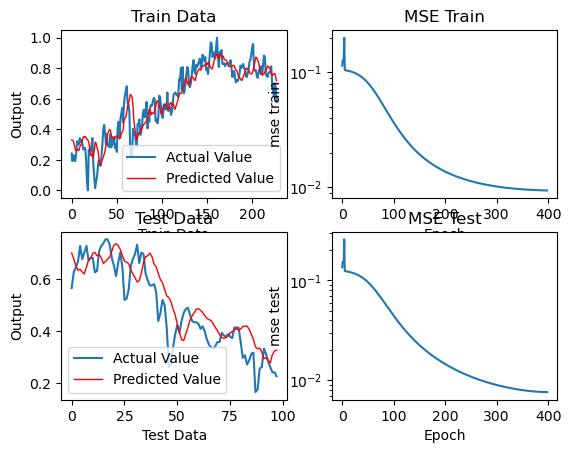

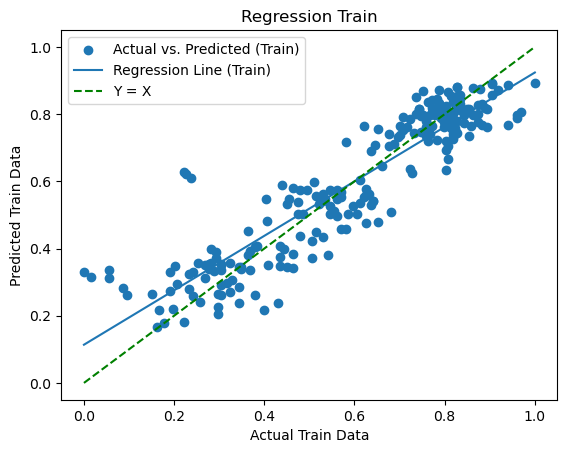

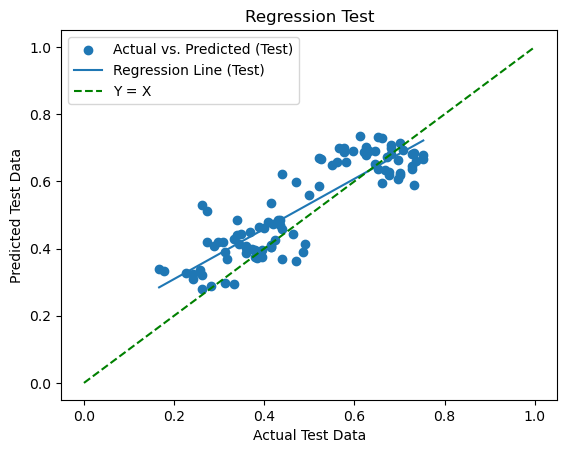

In [545]:
for t in range(epoch):
    error = np.zeros(n2)
    for i in range(num_train):
        X = X_train[i] # n0
        o_rbff = np.array([rbf_kernel(X_train[i], c, sigma) for c, sigma in zip(centersu, sigmas)])
        o_rbfff = np.array([rbf_kernel(X_train[i], c, sigma) for c, sigma in zip(centersl, sigmas)])
        o_rbfu = np.maximum(o_rbff, o_rbfff)
        o_rbfl = np.minimum(o_rbff, o_rbfff)
        o_rbf = 0.5*o_rbfl + 0.5*o_rbfu
        net1u = np.dot(w1u, o_rbf)
        net1l = np.dot(w1l, o_rbf)
        o1u = net1u
        o1l = net1l
        o1 = alpha*o1u + beta*o1l
        target = np.full(n2, Y_train[i])
        error = target - o1
        
        if net1u > net1l:
            for j in range(n1):
                centersu[j] += eta_rbf_CS *alpha* error.reshape(-1,1).T.dot(w1u).dot(o_rbfu)[0] * (X-centersu[j]) * (1/(sigmas[j]**2)) + eta_rbf_CS * beta*error.reshape(-1,1).T.dot(w1l).dot(o_rbfu)[0] * (X-centersu[j]) * (1/(sigmas[j]**2))
                centersl[j] += eta_rbf_CS *alpha* error.reshape(-1,1).T.dot(w1u).dot(o_rbfl)[0] * (X-centersl[j]) * (1/(sigmas[j]**2)) + eta_rbf_CS * beta*error.reshape(-1,1).T.dot(w1l).dot(o_rbfl)[0] * (X-centersl[j]) * (1/(sigmas[j]**2))
                sigmas[j] += eta_rbf_CS *alpha*error.reshape(-1,1).T.dot(w1u).dot(o_rbfl)[0]*(np.linalg.norm(X-centersl[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *alpha*error.reshape(-1,1).T.dot(w1u).dot(o_rbfu)[0]*(np.linalg.norm(X-centersu[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *beta*error.reshape(-1,1).T.dot(w1l).dot(o_rbfl)[0]*(np.linalg.norm(X-centersl[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *beta*error.reshape(-1,1).T.dot(w1l).dot(o_rbfu)[0]*(np.linalg.norm(X-centersu[j])**2)*(1/(sigmas[j]**3))
           
            w1u += eta_rbf_weights * alpha*error.reshape(-1,1).dot(o_rbf.reshape(-1,1).T)
            w1l += eta_rbf_weights * beta*error.reshape(-1,1).dot(o_rbf.reshape(-1,1).T)
            
        if net1u<net1l:
            for j in range(n1):
                centersu[j] += eta_rbf_CS *alpha* error.reshape(-1,1).T.dot(w1l).dot(o_rbfu)[0] * (X-centersu[j]) * (1/(sigmas[j]**2)) + eta_rbf_CS * beta*error.reshape(-1,1).T.dot(w1u).dot(o_rbfu)[0] * (X-centersu[j]) * (1/(sigmas[j]**2))
                centersl[j] += eta_rbf_CS *alpha* error.reshape(-1,1).T.dot(w1l).dot(o_rbfl)[0] * (X-centersl[j]) * (1/(sigmas[j]**2)) + eta_rbf_CS * beta*error.reshape(-1,1).T.dot(w1u).dot(o_rbfl)[0] * (X-centersl[j]) * (1/(sigmas[j]**2))
                sigmas[j] += eta_rbf_CS *alpha*error.reshape(-1,1).T.dot(w1l).dot(o_rbfl)[0]*(np.linalg.norm(X-centersl[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *alpha*error.reshape(-1,1).T.dot(w1l).dot(o_rbfu)[0]*(np.linalg.norm(X-centersu[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *beta*error.reshape(-1,1).T.dot(w1u).dot(o_rbfl)[0]*(np.linalg.norm(X-centersl[j])**2)*(1/(sigmas[j]**3)) + eta_rbf_CS *beta*error.reshape(-1,1).T.dot(w1u).dot(o_rbfu)[0]*(np.linalg.norm(X-centersu[j])**2)*(1/(sigmas[j]**3))
              
            w1u += eta_rbf_weights * alpha*error.reshape(-1,1).dot(o_rbf.reshape(-1,1).T)
            w1l += eta_rbf_weights * beta*error.reshape(-1,1).dot(o_rbf.reshape(-1,1).T)
            
    E_train = np.zeros(num_train)
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)
    for i in range(num_train):
        X = X_train[i] # n0
        o_rbff = np.array([rbf_kernel(X_train[i], c, sigma) for c, sigma in zip(centersu, sigmas)])
        o_rbfff = np.array([rbf_kernel(X_train[i], c, sigma) for c, sigma in zip(centersl, sigmas)])
        o_rbfu = np.maximum(o_rbff, o_rbfff)
        o_rbfl = np.minimum(o_rbff, o_rbfff)
        o_rbf = 0.5*o_rbfl + 0.5*o_rbfu
        net1u = np.dot(w1u, o_rbf)
        net1l = np.dot(w1l, o_rbf)
        o1u = net1u
        o1l = net1l
        o1 = alpha*o1u + beta*o1l
        output_data_train[i] = o1
        target = Y_train[i]
        E_train[i] = target - o1
        error_square_train[i] = (E_train[i]) ** 2
    mse_train[t] = np.mean(error_square_train)

    E_test = np.zeros(num_test)
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        X = X_test[i] # n0
        o_rbff = np.array([rbf_kernel(X_test[i], c, sigma) for c, sigma in zip(centersu, sigmas)])
        o_rbfff = np.array([rbf_kernel(X_test[i], c, sigma) for c, sigma in zip(centersl, sigmas)])
        o_rbfu = np.maximum(o_rbff, o_rbfff)
        o_rbfl = np.minimum(o_rbff, o_rbfff)
        o_rbf = 0.5*o_rbfl + 0.5*o_rbfu
        net1u = np.dot(w1u, o_rbf)
        net1l = np.dot(w1l, o_rbf)
        o1u = net1u
        o1l = net1l
        o1 = alpha*o1u + beta*o1l
        output_data_test[i] = o1
        target = Y_test[i]
        E_test[i] = target - o1
        error_square_test[i] = (E_test[i]) ** 2
        
    mse_test[t] = np.mean(error_square_test)

    plt.subplot(2, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(Y_train[:], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(2, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')

    # The test data plot
    plt.subplot(2, 2, 3)
    plt.cla()
    plt.plot(Y_test, label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(2, 2, 4)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(Y_train, output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(Y_train, output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(4)
plt.scatter(Y_test[:], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(Y_test[:], output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()   
